# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
10116,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0171,0.0024,0.0024,0,0,0,0
234702,0.2026,0.0171,0.0024,0.0024,0.0024,0.0024,0.0220,0.3809,0.0024,0.0488,0,0,0,0
387268,0.0269,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.1172,0.0854,0.0488,0,0,0,0
116208,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0342,0.0024,0.0122,0,0,0,0
442948,0.5688,0.2344,0.8325,0.2173,0.0098,0.0488,0.4224,0.9790,0.1440,0.0952,0,0,0,0


In [3]:
raw_data.shape

(471483, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

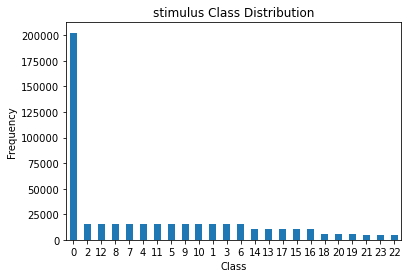

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
450230,0.8228,0.1758,0.2954,0.0659,0.0415,0.0806,1.2915,0.8203,0.1636,0.0464,9,9,21,21
225472,0.0879,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0903,0.0024,0.0391,0,0,0,0
420685,0.0244,0.0024,0.0024,0.0024,0.0024,0.0024,0.0269,0.1978,0.0952,0.0244,0,0,0,0
345334,0.1465,0.0024,0.0293,0.0024,0.0024,0.0024,0.0562,0.2417,0.7275,0.1367,4,4,11,11
326669,0.0903,0.0098,0.0024,0.0024,0.0024,0.0024,0.0879,0.1685,0.1050,0.0586,5,5,9,9


In [12]:
raw_data.shape

(378535, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378535 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          378535 non-null  float64
 1   Emg2          378535 non-null  float64
 2   Emg3          378535 non-null  float64
 3   Emg4          378535 non-null  float64
 4   Emg5          378535 non-null  float64
 5   Emg6          378535 non-null  float64
 6   Emg7          378535 non-null  float64
 7   Emg8          378535 non-null  float64
 8   Emg9          378535 non-null  float64
 9   Emg10         378535 non-null  float64
 10  repetition    378535 non-null  int64  
 11  rerepetition  378535 non-null  int64  
 12  stimulus      378535 non-null  int64  
 13  restimulus    378535 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# LocallyLinearEmbedding

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html#sklearn.manifold.LocallyLinearEmbedding

In [18]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
X_embedded = LocallyLinearEmbedding(n_components=8).fit_transform(X)

In [ ]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

In [ ]:
y_pred1 = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

In [ ]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

In [ ]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

In [ ]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

# ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

In [ ]:
y_pred5 = extratree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

In [ ]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

In [ ]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

In [ ]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

# XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
y_pred4 = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

In [ ]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))